In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [ ]:
df=pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.drop(['Car_Name'],axis=1, inplace=True)

In [ ]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [ ]:
df.columns
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [ ]:
df.dtypes

,0
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Owner,int64
Fuel_Type_Diesel,bool
Fuel_Type_Petrol,bool
Selling_type_Individual,bool
Transmission_Manual,bool


In [ ]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [ ]:
X=df[['Year', 'Present_Price', 'Driven_kms', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual']]
y=df['Selling_Price']



In [ ]:
# X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.1 ,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=42)


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
# Training accuracy
train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, train_pred)
print(train_r2)

0.8852207744330706


In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8207636281692393
2.6731899629177343


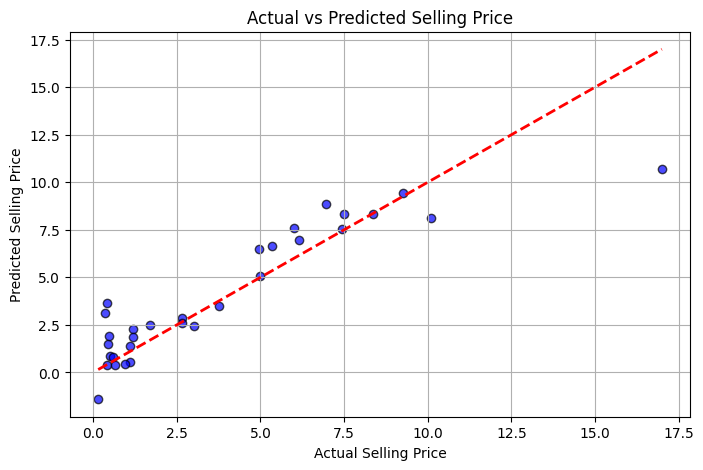

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()

In [ ]:
df1=pd.read_csv('/content/car data.csv')
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df1 = pd.get_dummies(df1, columns=['Car_Name','Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [ ]:
df1['Year_encoded']=df1['Year'] - df1['Year'].min()

In [ ]:
df1.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       ...
       'Car_Name_sx4', 'Car_Name_verna', 'Car_Name_vitara brezza',
       'Car_Name_wagon r', 'Car_Name_xcent', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual',
       'Year_encoded'],
      dtype='object', length=107)

In [ ]:
df1.drop('Year', axis=1, inplace=True)

In [ ]:
df1

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Year_encoded
0,3.35,5.59,27000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,11
1,4.75,9.54,43000,0,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,10
2,7.25,9.85,6900,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,14
3,2.85,4.15,5200,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,8
4,4.60,6.87,42450,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,13
297,4.00,5.90,60000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,12
298,3.35,11.00,87934,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,6
299,11.50,12.50,9000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,14


In [ ]:
X=df1.drop('Selling_Price',axis=1)
y=df1['Selling_Price']
print(X.shape)
print(y.shape)

(301, 105)
(301,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
scalar=StandardScaler()

In [ ]:
columns_to_scale = ['Present_Price', 'Driven_kms']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

In [ ]:
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
model2=LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model2.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.0649867947504913
13.945093230455392


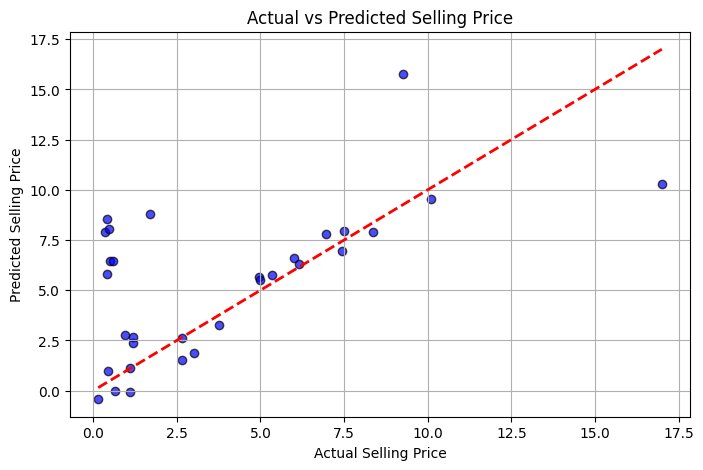

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()

In [ ]:
y_pred=lasso_model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.850695909710242
2.226770110934857


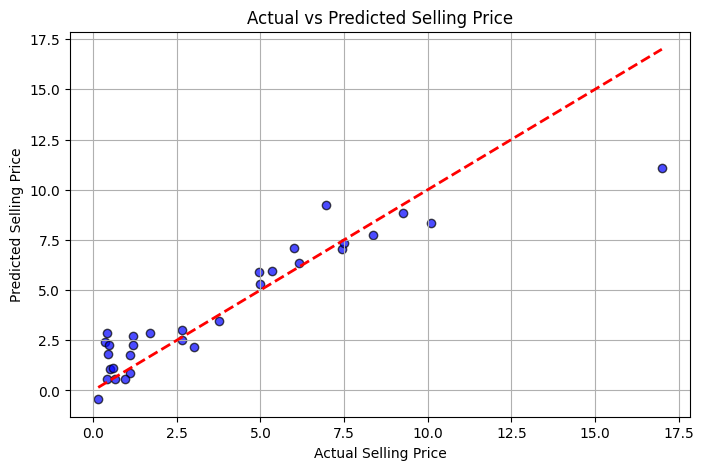

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred = poly_model.predict(X_test)

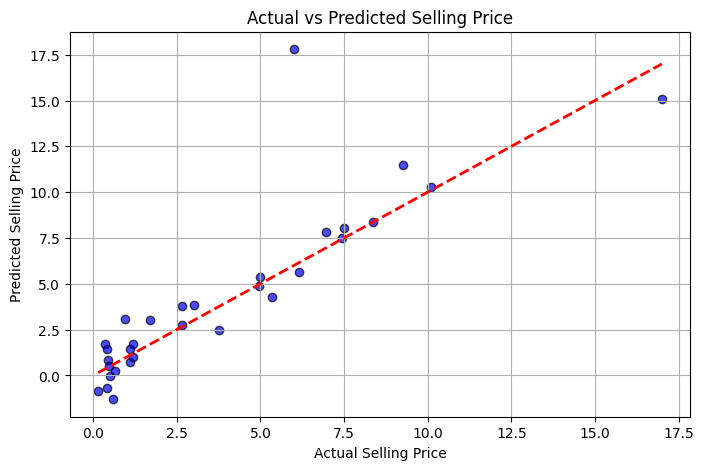

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_pred = model.predict(X_test)

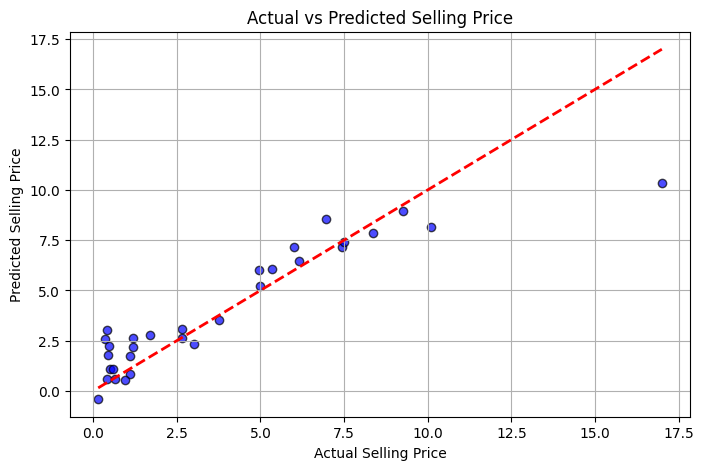

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = model.predict(X_test)

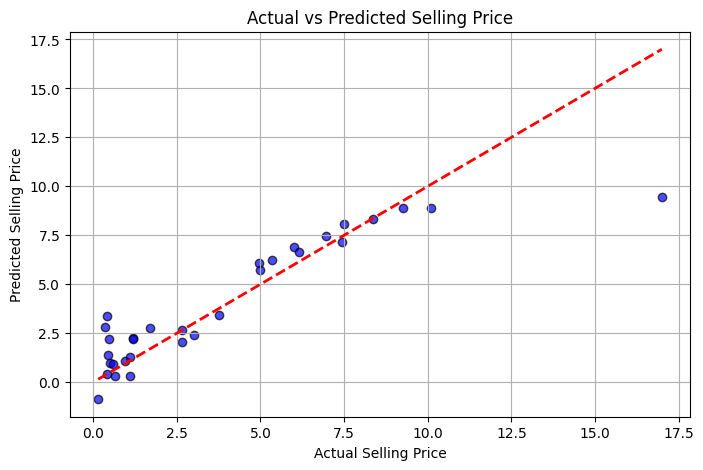

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import QuantileRegressor

In [ ]:
model = QuantileRegressor(quantile=0.5, alpha=0)
model.fit(X_train, y_train)

QuantileRegressor(alpha=0)

In [ ]:
y_pred = model.predict(X_test)

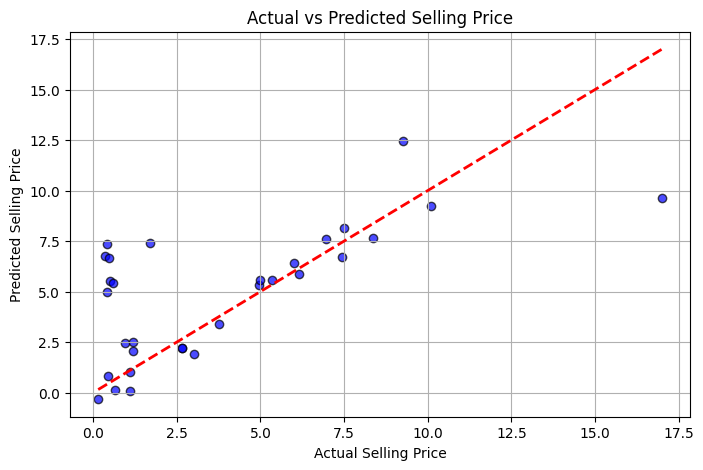

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import HuberRegressor

In [ ]:
model = HuberRegressor(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

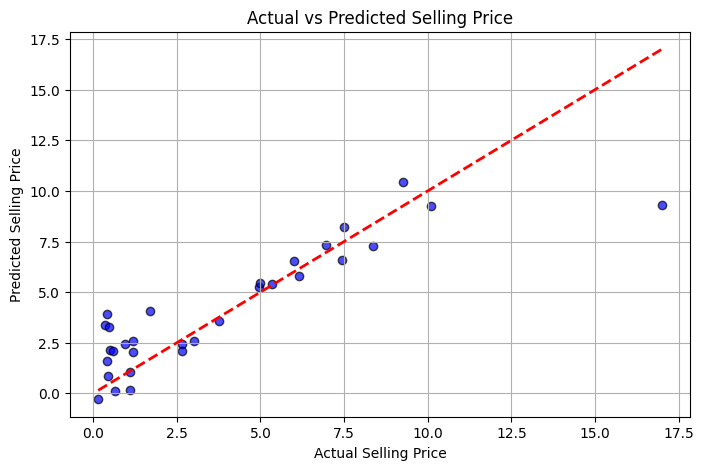

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train, y_train)

SVR(C=100)

In [ ]:
y_pred = model.predict(X_test)

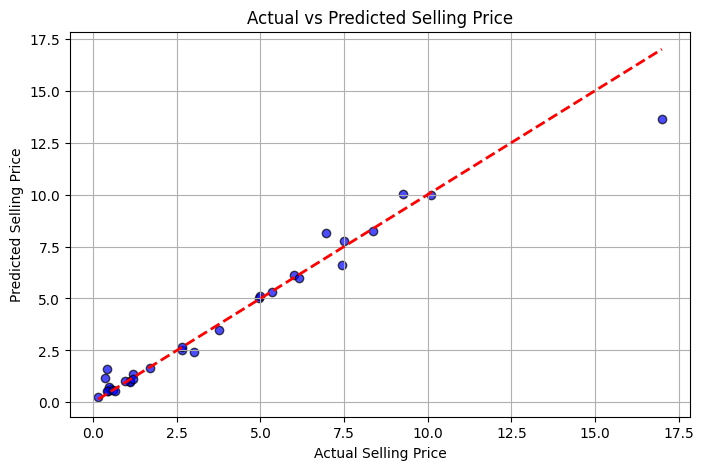

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()